In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
df = pd.read_csv(r'C:\Users\AANCHAL\Desktop\Study\Elevated Labs Internship\Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [132]:
df.drop('Name', axis = 1, inplace = True)

In [133]:
df.drop('Ticket', axis = 1, inplace = True)

In [134]:
df.shape

(891, 10)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [136]:
# to check missing values %
print(df.isnull().mean()*100) 

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [137]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [138]:
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\AANCHAL\AppData\Local\Temp\ipykernel_20984\1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [139]:
df['Cabin'].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [140]:
df.drop('Cabin', axis = 1, inplace = True)

In [141]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [142]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

C:\Users\AANCHAL\AppData\Local\Temp\ipykernel_20984\1994620826.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)


In [143]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [144]:
cat_cols = df.select_dtypes(
    include = 'object'
).columns
print(cat_cols)

Index(['Sex', 'Embarked'], dtype='object')


In [145]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [146]:
df['Sex'].dtype

dtype('int64')

In [147]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [148]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked_Q        bool
Embarked_S        bool
dtype: object

In [149]:
num_cols = df.select_dtypes(
    include = ['int64', 'float64']
).columns
print(num_cols)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')


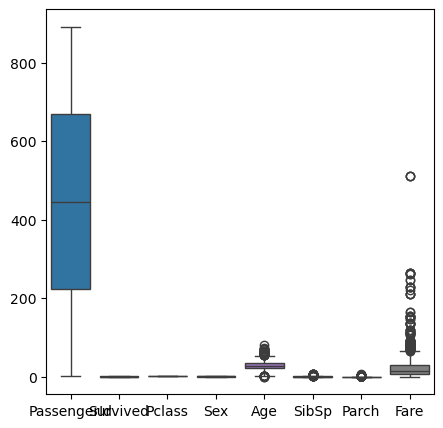

In [150]:
plt.figure(figsize=(5,5))
sns.boxplot(data = df[num_cols])

plt.show()

In [151]:
cols = ['Age', 'SibSp', 'Parch', 'Fare']

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    df[col] = df[col].clip(lower, upper)

In [152]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df[num_cols] = sc.fit_transform(df[num_cols])

In [153]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,-1.730108,-0.789272,0.827377,0.737695,-0.583432,0.810220,0.0,-0.820552,False,True
1,-1.726220,1.266990,-1.566107,-1.355574,0.742685,0.810220,0.0,2.031623,False,False
2,-1.722332,1.266990,0.827377,-1.355574,-0.251903,-0.602512,0.0,-0.787578,False,True
3,-1.718444,1.266990,-1.566107,-1.355574,0.494038,0.810220,0.0,1.419297,False,True
4,-1.714556,-0.789272,0.827377,0.737695,0.494038,-0.602512,0.0,-0.781471,False,True
